In [1]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt

import math
%matplotlib inline

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [2]:
# outdir = '/media/juliana/MAC/data/JR009/20150625b/20150625_JR009_500um_0080Hz/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_red2/structs'
# outdir = '/media/juliana/IMDATA/widefield/JR005W/20160222/awake_bar_0013hz/structs'

# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0013/structs'
# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs'

# outdir = '/media/nas/volume1/widefield/data/CE015/20160706/CE015_circle_013/structs'
# outdir = '/media/nas/volume1/widefield/data/CE015/20160706/CE015_bar_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/CE015/20160715/CE015_bar_013Hz/structs'


# outdir = '/media/nas/volume1/widefield/data/JR006W/20160715/JR006W_bar_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160716/JR006W_bar_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR006W/20160716/JR006W_width2_bar_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160716/JR006W_bar_008Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_bar_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160720/JR006W_30cyc_bar_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR006W/20160720/JR006W_bar_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_bar_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_30cyc_bar_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bar_013Hz/structs'

outdir = '/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs'


# reduce_factor = (1, 1)
# reduceit=0
# run_num = str(1)
# append = 'nas'

In [3]:
rundir = os.path.split(outdir)[0]
sessiondir = os.path.split(rundir)[0]
reduceit=0

/media/nas/volume1/widefield/data/JR017W/20160817
surface
['16bitSurf (5)_surface.tif']
.tif


(-0.5, 217.5, 163.5, -0.5)

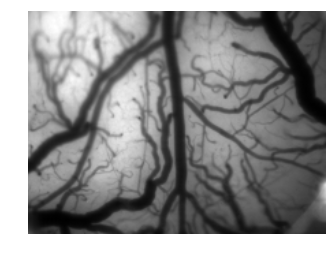

In [4]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
folders = os.listdir(sessiondir)
figpath = [f for f in folders if f == 'surface'][0]

folders = os.listdir(sessiondir)
# figpath = [f for f in folders if f == 'surface'][0]

print sessiondir
print figpath

if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figpath))
    surface_words = ['surface', 'GREEN', 'green', 'Surface', 'Surf']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    ims = [i for i in ims if '_' in i]
    print ims
    impath = os.path.join(sessiondir, figpath, ims[0])

    
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)

plt.imshow(surface, cmap='gray')
plt.axis('off')

In [5]:

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
# dstructs = [f for f in files if 'D_target_FFT' in f and str(reduce_factor) in f]
# if not dstructs:
#     dstructs = [f for f in files if 'D_' in f and str(reduce_factor) in f] # address older analysis formats

append='nas'
dstructs = [f for f in files if 'Target_fft' in f]
print dstructs

D = dict()
for f in dstructs:
    outfile = os.path.join(outdir, f)
    with open(outfile,'rb') as fp:
        D[f] = pkl.load(fp)


['Target_fft_Bottom_run1_(3, 3)_reduce.pkl', 'Target_fft_Left_run1_(3, 3)_reduce.pkl', 'Target_fft_Top_run1_(3, 3)_reduce.pkl', 'Target_fft_Right_run1_(3, 3)_reduce.pkl', 'Target_fft_Bottom_run2_(3, 3)_reduce.pkl', 'Target_fft_Right_run2_(3, 3)_reduce.pkl', 'Target_fft_Bottom_run1_(1, 1)_.pkl', 'Target_fft_Top_run1_(1, 1)_.pkl', 'Target_fft_Left_run1_(1, 1)_.pkl', 'Target_fft_Right_run2_(1, 1)_.pkl', 'Target_fft_Right_run1_(1, 1)_.pkl', 'Target_fft_Bottom_run2_(1, 1)_.pkl', 'Target_fft_blank_run0_(1, 1)_.pkl', 'Target_fft_blank_run0_(3, 3)_reduce.pkl', 'Target_fft_Right_run2_(1, 1)_detrend.pkl']


In [6]:
# Get specific keys:

bottomkeys = [k for k in D.keys() if 'Bottom' in k or 'Up' in k]
topkeys = [k for k in D.keys() if 'Top' in k or 'Down' in k]

leftkeys = [k for k in D.keys() if 'Left' in k]
rightkeys = [k for k in D.keys() if 'Right' in k]

el_keys = [topkeys, bottomkeys]
az_keys = [leftkeys, rightkeys]

print "AZ keys: ", az_keys
print "EL keys: ", el_keys

# curr_keys = [leftkey, rightkey, topkey, bottomkey]

# for curr_key in curr_keys:
#     print curr_key, outshape

#     if "Left" in curr_key:
#         leftmap = D[curr_key]['ft']
#     elif "Right" in curr_key:
#         rightmap = D[curr_key]['ft']
#     elif "Down" in curr_key or "Top" in curr_key:
#         downmap = D[curr_key]['ft']
#     elif "Up" in curr_key and "Bottom" in curr_key:
#         upmap = D[curr_key]['ft']

AZ keys:  [['Target_fft_Left_run1_(3, 3)_reduce.pkl', 'Target_fft_Left_run1_(1, 1)_.pkl'], ['Target_fft_Right_run2_(3, 3)_reduce.pkl', 'Target_fft_Right_run2_(1, 1)_detrend.pkl', 'Target_fft_Right_run1_(1, 1)_.pkl', 'Target_fft_Right_run1_(3, 3)_reduce.pkl', 'Target_fft_Right_run2_(1, 1)_.pkl']]
EL keys:  [['Target_fft_Top_run1_(3, 3)_reduce.pkl', 'Target_fft_Top_run1_(1, 1)_.pkl'], ['Target_fft_Bottom_run2_(3, 3)_reduce.pkl', 'Target_fft_Bottom_run1_(3, 3)_reduce.pkl', 'Target_fft_Bottom_run2_(1, 1)_.pkl', 'Target_fft_Bottom_run1_(1, 1)_.pkl']]


In [7]:
# grab legends:

legend_dir = '/home/juliana/Repositories/retinotopy-mapper/tests/simulation'

# MAKE LEGENDS:

winsize = [1920, 1200]
screen_size = [int(i*0.25) for i in winsize]
print screen_size

create_legend = 1

if create_legend:
    V_left_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][0:screen_size[0]/2] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Left_legend.tif'
    V_left_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:
    V_right_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][0:screen_size[0]/2] = nspaces_start
    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Right_legend.tif'
    V_right_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:        
    H_down_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[screen_size[1]/2:, i] = nspaces_end
        
else:
    legend_name = 'H-Down_legend.tif'
    H_down_legend = imread(os.path.join(legend_dir, legend_name))


if create_legend:
    H_up_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[screen_size[1]/2:, i] = nspaces_end
else:
    legend_name = 'H-Up_legend.tif'
    H_up_legend = imread(os.path.join(legend_dir, legend_name))


[480, 300]


<matplotlib.colorbar.Colorbar instance at 0x7f38d67e3e60>

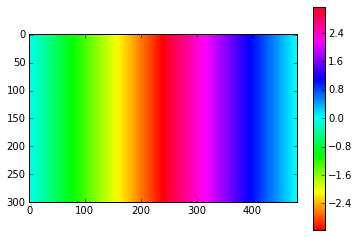

In [8]:
plt.imshow(V_left_legend, cmap='hsv')
plt.colorbar()

Curr key is:  Target_fft_Left_run1_(1, 1)_.pkl
Showing:  Target_fft_Left_run1_(1, 1)_.pkl


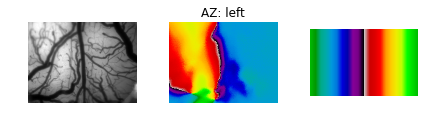

In [9]:
######################################################################
# V-LEFT:
######################################################################

# run_num = 2
# reduce_factor = (1, 1)
# append = 'nas'
# cond_type = 'Left'

run_num = 1
reduce_factor = (1, 1)
append = ''#'nas'
cond_type = 'Left'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in leftkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print leftkeys
else:
    leftkey = tmp_keys[0]
    print "Curr key is: ", leftkey

leftmap = D[leftkey]['ft']

currkey = leftkey
currmap = leftmap

fig = plt.figure()

# plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# # plt.title('AZ: right to left')
# plt.axis('off')

# impath = os.path.join(outdir, currkey+'.png')
# plt.savefig(impath, format='png')


print "Showing: ", currkey

plt.subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: left')
plt.axis('off')

ax = fig.add_subplot(1,3,3)
plt.imshow(V_left_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

plt.tight_layout()


/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs/Target_fft_Left_run1_(1, 1)_.pkl.png


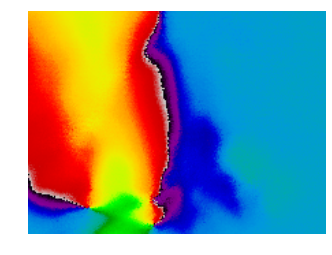

In [10]:

# JUST plot the figure, for slide

plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: right to left')
plt.axis('off')

# imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, currkey+'.png')
plt.savefig(impath, format='png')


print impath

Curr key is:  Target_fft_Right_run2_(1, 1)_.pkl
Showing:  Target_fft_Right_run2_(1, 1)_.pkl


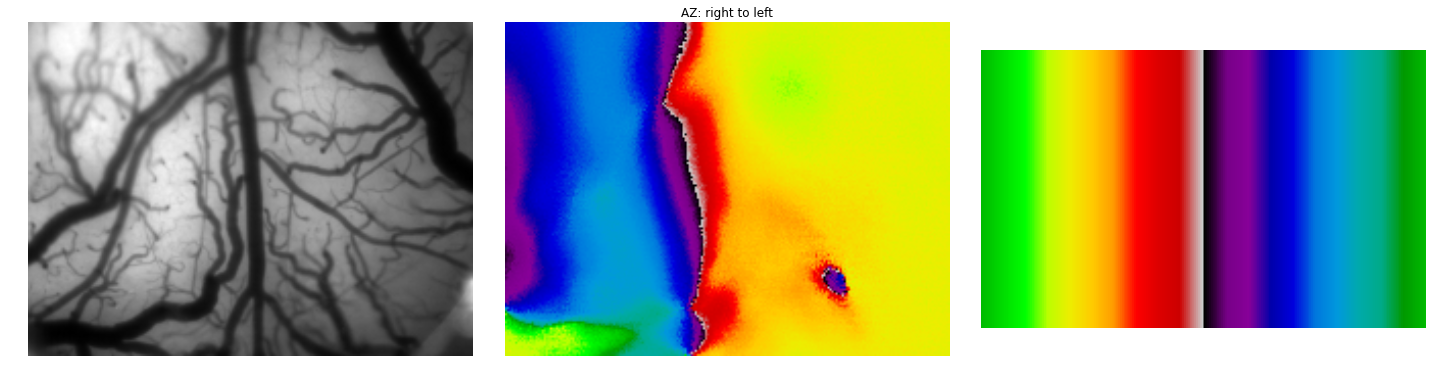

In [12]:
######################################################################
# V-RIGHT:
######################################################################
# fig = plt.figure()


run_num = 2 #3
reduce_factor = (1, 1)
append = '_.pkl'#'nas'
cond_type = 'Right'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in rightkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print rightkeys
else:
    rightkey = tmp_keys[0]
    print "Curr key is: ", rightkey

rightmap = D[rightkey]['ft']

currkey = rightkey
currmap = rightmap

fig = plt.figure(figsize=(20,10))
print "Showing: ", currkey

plt.subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: right to left')
plt.axis('off')

ax = fig.add_subplot(1,3,3)
plt.imshow(V_right_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

plt.tight_layout()

/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs/Target_fft_Right_run2_(1, 1)_.pkl.png


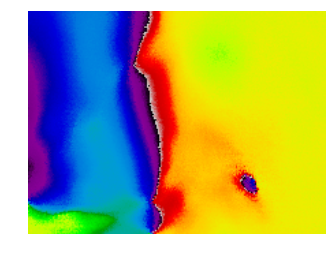

In [13]:

# JUST plot the figure, for slide

plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: right to left')
plt.axis('off')

# imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, currkey+'.png')
plt.savefig(impath, format='png')


print impath

Curr key is:  Target_fft_Top_run1_(1, 1)_.pkl
Showing:  Target_fft_Top_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

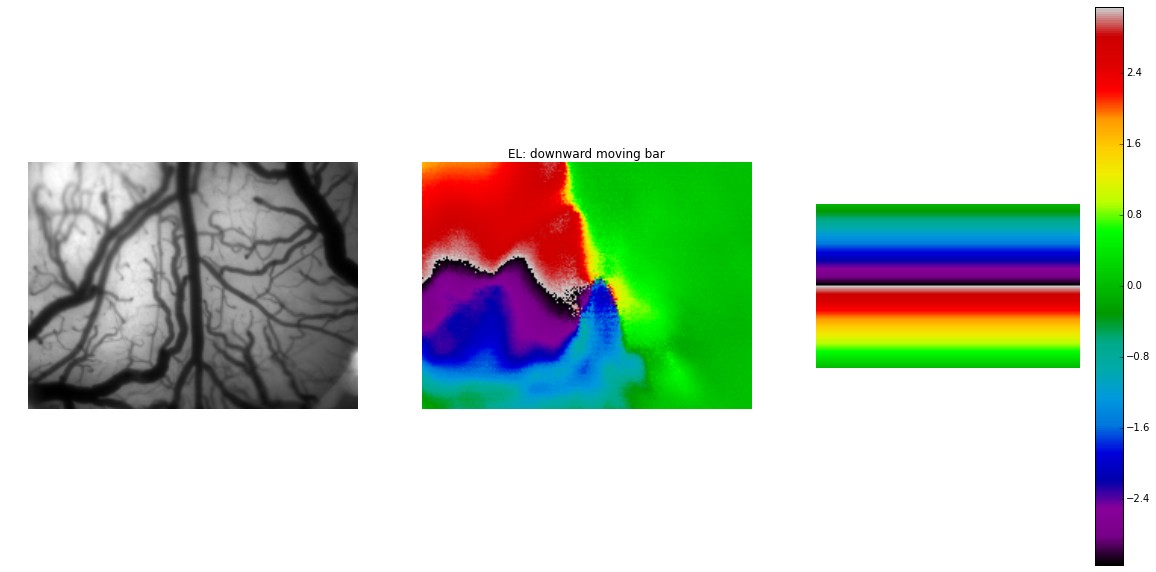

In [14]:
######################################################################
# H-TOP: start from top, move down ("downward")
######################################################################


# run_num = 3
# reduce_factor = (1, 1)
# append = 'nas'
# # cond_type = 'Top'
# cond_type = 'Down'

run_num = 1 #3
reduce_factor = (1, 1)
append = '' #'nas'
cond_type = 'Top'
# cond_type = 'Down'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in topkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print topkeys
else:
    topkey = tmp_keys[0]
    print "Curr key is: ", topkey

topmap = D[topkey]['ft']

currkey = topkey
currmap = topmap

print "Showing: ", currkey
fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('EL: downward moving bar')


ax = fig.add_subplot(1,3,3)
plt.imshow(H_down_legend, cmap='spectral')
plt.axis('off')
plt.colorbar()


fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs/Target_fft_Top_run1_(1, 1)_.pkl.png


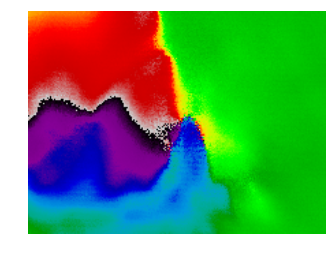

In [15]:

# JUST plot the figure, for slide

plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: right to left')
plt.axis('off')

# imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, currkey+'.png')
plt.savefig(impath, format='png')


print impath

Curr key is:  Target_fft_Bottom_run1_(1, 1)_.pkl
Curr key is:  Target_fft_Bottom_run1_(1, 1)_.pkl
Showing:  Target_fft_Bottom_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

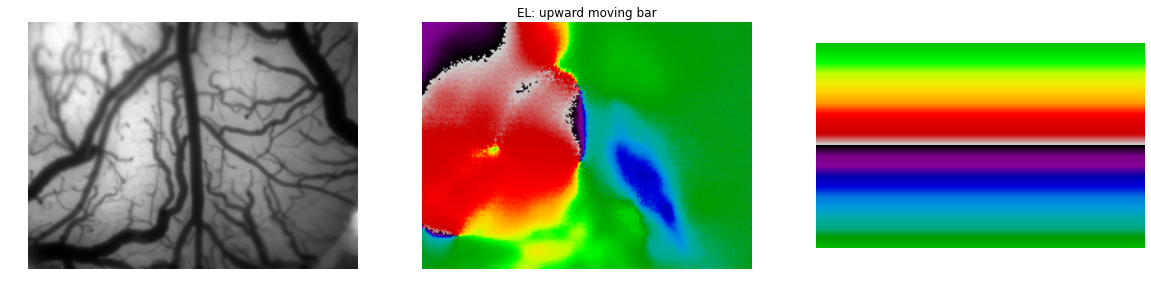

In [42]:
######################################################################
# H-BOTTOM: bar moving from BOTTOM to TOP ("UPward")
######################################################################


# run_num = 3
# reduce_factor = (1, 1)
# append = 'nas'
# # cond_type = 'Bottom'
# cond_type = 'Up'


run_num = 1 #3
reduce_factor = (1, 1)
append = ''#'nas'
cond_type = 'Bottom'
# cond_type = 'Up'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in bottomkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print bottomkeys
else:
    bottomkey = tmp_keys[0]
    print "Curr key is: ", bottomkey

bottommap = D[bottomkey]['ft']

## alternative bottom:
run_num=2
run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in bottomkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print bottomkeys
else:
    bottomkey2 = tmp_keys[0]
    print "Curr key is: ", bottomkey
bottommap2 = D[bottomkey2]['ft']


currkey = bottomkey
currmap = bottommap

print "Showing: ", currkey

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,3)
plt.imshow(H_up_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('EL: upward moving bar')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')


/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs/Target_fft_Bottom_run1_(1, 1)_.pkl.png


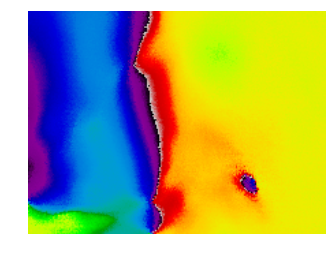

In [18]:

# JUST plot the figure, for slide

plt.imshow(np.angle(rightmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: right to left')
plt.axis('off')

# imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, currkey+'.png')
plt.savefig(impath, format='png')


print impath

In [ ]:
#########################################################

/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/figures/both_contour_AZ_HSV_Target_fft_Left_run1_(1, 1)_.pkl.eps


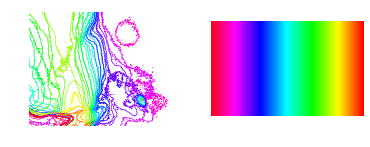

In [91]:
#########################################################
# CONTOUR:
#########################################################
colormap='hsv'
left_contours = np.angle(leftmap) #D[leftkey]['phase_map']
right_contours = np.angle(rightmap.conjugate()) #D[rightkey]['phase_map']

vmin_val = -1*math.pi
vmax_val = 1*math.pi

# Do the thing to deal with averaging across -pi and pi:
# Vmap[Vmap<0]=2*math.pi+Vmap[Vmap<0]
left_contours[left_contours<0] += 2*math.pi
right_contours[right_contours<0] += 2*math.pi
V_left_legend[V_left_legend<0] += 2*math.pi

vmin_val = 0
vmax_val = 2*math.pi

az_avg = (left_contours + right_contours) / 2.

levels = np.arange(vmin_val, vmax_val, .35)
# levels = np.arange(vmin_val, vmax_val, .35) # 0.35 works well for AVG

plt.subplot(1,2,1)
plt.imshow(surface, cmap='gray', alpha=0)
plt.axis('off')

plt.contour(left_contours, levels, origin='lower', cmap=colormap, linewidths=.7)
plt.contour(right_contours, levels, origin='lower', cmap=colormap, linewidths=.7)

# plt.contour(az_avg, levels, origin='lower', cmap=colormap, linewidths=.7)

plt.subplot(1,2,2)
plt.imshow(V_left_legend, cmap='hsv') # if conjugating right map, use LEFT legend.
plt.axis('off')


#########################################################
# SAVE THIS:

savedir = os.path.split(outdir)[0]

figdir = os.path.join(savedir, 'figures')

imname = 'both_contour_AZ_HSV_%s' % leftkey
impath = os.path.join(figdir, imname+'.eps')
plt.savefig(impath, format='eps')
print impath


/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/figures/both_contour_better_EL_HSV_Target_fft_Top_run1_(1, 1)_.pkl.eps


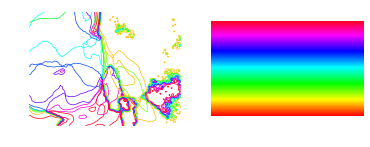

In [105]:
#########################################################
# CONTOUR -- ELEVATION
#########################################################
colormap='hsv'

smooth = False
sigma_val_num = 1
sigma_val = (sigma_val_num, sigma_val_num)

top_contours = np.angle(topmap) #D[leftkey]['phase_map']
bottom1_contours = np.angle(bottommap.conjugate()) #D[rightkey]['phase_map']
bottom2_contours = np.angle(bottommap2.conjugate()) #D[rightkey]['phase_map']
# bottom_contours = (bottom1_contours + bottom2_contours) / 2.
bottom_contours = np.angle(bottommap.conjugate())


vmin_val = -1*math.pi
vmax_val = 1*math.pi

# Do the thing to deal with averaging across -pi and pi:
# Vmap[Vmap<0]=2*math.pi+Vmap[Vmap<0]
top_contours[top_contours<0] += 2*math.pi
bottom_contours[bottom_contours<0] += 2*math.pi
H_down_legend[H_down_legend<0] += 2*math.pi

vmin_val = 0
vmax_val = 2*math.pi

if smooth:
    top_contours = ndimage.gaussian_filter(top_contours, sigma=sigma_val, order=0)
    bottom_contours = ndimage.gaussian_filter(bottom_contours, sigma=sigma_val, order=0)
else:
    top_contours = ndimage.gaussian_filter(top_contours, sigma=sigma_val, order=0)
    bottom_contours = ndimage.gaussian_filter(bottom_contours, sigma=sigma_val, order=0)


# el_avg = (top_contours + bottom2_contours) / 2.
el_avg = (top_contours + bottom_contours) / 2.

levels = np.arange(vmin_val, vmax_val, .7) #.3) 
# levels = np.arange(vmin_val, vmax_val, .35) # AVG

plt.subplot(1,2,1)
plt.imshow(surface, cmap='gray', alpha=0)
plt.axis('off')

plt.contour(top_contours, levels, origin='lower', cmap=colormap, linewidths=.7)
plt.contour(bottom_contours, levels, origin='lower', cmap=colormap, linewidths=.7)

# plt.contour(el_avg, levels, origin='lower', cmap=colormap, linewidths=.7)

plt.subplot(1,2,2)
plt.imshow(H_down_legend, cmap='hsv') # if conjugating bottom map, use top legend.
plt.axis('off')

#########################################################
# SAVE THIS:

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if smooth is True:
    imname = 'both_contour_smooth%i_EL_HSV_%s' % (int(sigma_val_num), topkey)
else:
    imname = 'both_contour_better_EL_HSV_%s' % (topkey)
impath = os.path.join(figdir, imname+'.eps')
plt.savefig(impath, format='eps')
print impath

(-0.5, 479.5, 299.5, -0.5)

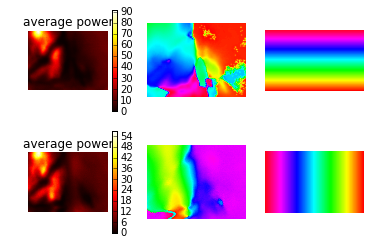

In [114]:
# NO CONTOURS, JUST FULL:

Ny = len(D[topkey]['freqs'])
el_avg_mag = (D[topkey]['mag_map'] + D[bottomkey]['mag_map']) / Ny / 2.
az_avg_mag = (D[leftkey]['mag_map'] + D[rightkey]['mag_map']) / Ny / 2.


plt.subplot(2,3,1)
plt.title('average power')
plt.imshow(el_avg_mag**2, cmap='hot')
plt.axis('off')
plt.colorbar()

plt.subplot(2,3,2)
plt.imshow(surface, cmap='gray', alpha=0)
plt.axis('off')
plt.imshow(el_avg, origin='upper', cmap=colormap)

plt.subplot(2,3,3)
plt.imshow(H_down_legend, cmap='hsv') # if conjugating bottom map, use top legend.
plt.axis('off')


plt.subplot(2,3,4)
plt.title('average power')
plt.imshow(az_avg_mag**2, cmap='hot')
plt.axis('off')
plt.colorbar()

plt.subplot(2,3,5)
plt.imshow(surface, cmap='gray')
plt.axis('off')

# plt.imshow(left_contours, levels, origin='lower', cmap=colormap, linewidths=.7)
# plt.contour(right_contours, levels, origin='lower', cmap=colormap, linewidths=.7)

plt.imshow(az_avg, origin='upper', cmap=colormap)

plt.subplot(2,3,6)
plt.imshow(V_left_legend, cmap='hsv') # if conjugating right map, use LEFT legend.
plt.axis('off')


#########################################################
# SAVE THIS:

# savedir = os.path.split(outdir)[0]
# figdir = os.path.join(savedir, 'figures')
# if smooth is True:
#     imname = 'both_contour_smooth%i_EL_HSV_%s' % (int(sigma_val_num), topkey)
# else:
#     imname = 'both_contour_better_EL_HSV_%s' % (topkey)
# impath = os.path.join(figdir, imname+'.eps')
# plt.savefig(impath, format='eps')
# print impath


(0.0, 218.0, 0.0, 164.0)

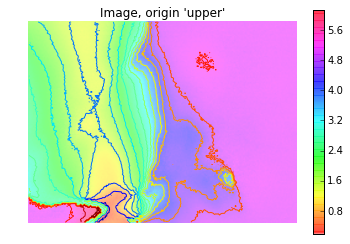

In [162]:
curr_phase_map = az_avg
curr_mag_map = az_avg_mag #**2

extent = (0, curr_phase_map.shape[1], 0, curr_phase_map.shape[0])
# levels = np.arange(vmin_val, vmax_val, .35)
levels = np.arange(0, 2*math.pi, .35)


im = plt.imshow(curr_phase_map, origin='upper', extent=extent, cmap='hsv', alpha=0.5) #, norm=norm)

v = plt.axis()
# plt.contour(curr_phase_map, levels, hold='on', colors='k', origin='upper', extent=extent)
plt.contour(curr_phase_map, levels, hold='on', origin='upper', extent=extent)

plt.axis(v)

plt.title("Image, origin 'upper'")
plt.colorbar(im)
plt.axis('off')


Cutoff at:  10
/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/figures/avg_masked_EZ_HSV_Target_fft_Left_run1_(1, 1)_.pkl.eps


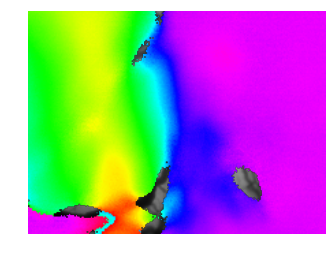

In [157]:
# MASK!:

threshold = 10
threshold_type = 'DC';

if threshold_type=='DC':
    top_DC_mag = D[topkey]['DC_mag']/Ny
    bottom_DC_mag = D[bottomkey]['DC_mag']/Ny
    el_avg_DC = (top_DC_mag+bottom_DC_mag)/2.
    
    left_DC_mag = D[leftkey]['DC_mag']/Ny
    right_DC_mag = D[rightkey]['DC_mag']/Ny
    az_avg_DC = (left_DC_mag+right_DC_mag)/2.
    
elif threshold_type=='magmax' or threshold_type=='logmax':
    thresh_map = mag_map
elif threshold_type=='blank': # 07-27-2016:  this doesnt exist yet!
    blank_mag_map = D[blank_key]['mag_map']/Ny
    thresh_map = blank_mag_map

import colorsys


# DO ELEVATION FIRST:
# curr_phase_map = el_avg
# curr_mag_map = el_avg_mag #**2
# curr_thresh_map = el_avg_DC #**2

# ## DO AZIMUTH, TOO:
curr_phase_map = az_avg
curr_mag_map = az_avg_mag #**2
curr_thresh_map = az_avg_DC #**2

            
print "Cutoff at: ", threshold

[mx, my] = np.where(curr_mag_map >= threshold*(curr_thresh_map+0.1))
# [mx, my] = np.where(curr_mag_map >= threshold*np.std(curr_mag_map))

phase_mask = np.ones(curr_mag_map.shape) * 100
phase_mask[mx, my] = curr_phase_map[mx, my]
[nullx, nully] = np.where(phase_mask == 100)

phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(surface, cmap='gray')
plt.imshow(phase_mask, cmap=colormap)
plt.axis('off')

# SAVE IT:
savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
imname = 'avg_masked_EZ_HSV_%s' % (leftkey)
impath = os.path.join(figdir, imname+'.eps')
plt.savefig(impath, format='eps')
print impath


HUE range:  0.0122577704489 0.952611775802
VAL range:  0.0324334177459 1.52467115633
Cutoff at:  20
(164, 218)
/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/figures/avg_EL_HSV_Target_fft_Top_run1_(1, 1)_.pkl.eps


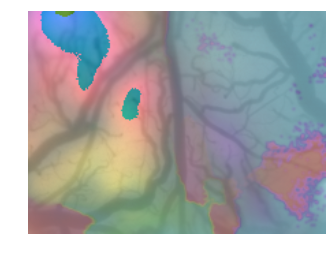

In [135]:
# CHECKOUT HSV:
threshold = 20
threshold_type = 'DC';

if threshold_type=='DC':
    top_DC_mag = D[topkey]['DC_mag']/Ny
    bottom_DC_mag = D[bottomkey]['DC_mag']/Ny
    el_avg_DC = (top_DC_mag+bottom_DC_mag)/2.
    
    left_DC_mag = D[leftkey]['DC_mag']/Ny
    right_DC_mag = D[rightkey]['DC_mag']/Ny
    az_avg_DC = (left_DC_mag+right_DC_mag)/2.
    
elif threshold_type=='magmax' or threshold_type=='logmax':
    thresh_map = mag_map
elif threshold_type=='blank': # 07-27-2016:  this doesnt exist yet!
    blank_mag_map = D[blank_key]['mag_map']/Ny
    thresh_map = blank_mag_map

import colorsys

def get_normed_map(orig, oldmin, oldmax, newmin, newmax):
    normed = np.zeros(orig.shape)
    for x in range(normed.shape[0]):
        for y in range(normed.shape[1]):
            oldval = orig[x,y]
            normed[x,y] =  (((oldval - oldmin) * (newmax - newmin)) / (oldmax - oldmin)) + newmin
    return normed

## DO ELEVATION FIRST:
# curr_phase_map = el_avg
# curr_mag_map = el_avg_mag #**2
# curr_thresh_map = el_avg_DC #**2

## DO AZIMUTH, TOO:
curr_phase_map = az_avg
curr_mag_map = az_avg_mag #**2
curr_thresh_map = az_avg_DC #**2


old_min = 0 #-math.pi #phase_map.min()
old_max = 2*math.pi #math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase = get_normed_map(curr_phase_map, old_min, old_max, new_min, new_max)
normed_mag = get_normed_map(curr_mag_map, old_min, old_max, new_min, new_max)

hue = normed_phase
sat = np.ones(hue.shape)
val = normed_mag

print "HUE range: ", hue.min(), hue.max()
print "VAL range: ", val.min(), val.max()

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * -0.5 #1
HSV[...,1] = val

convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):
            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
            
print "Cutoff at: ", threshold

nons = []
for x in range(curr_mag_map.shape[0]):
    for y in range(curr_mag_map.shape[1]):
#         if use_norm is True:
#             if normed_mag_map[x, y] < normed_thresh_map[x, y]*threshold:
#                 nons.append([x,y])
#         else:
        if curr_mag_map[x, y] < curr_thresh_map[x, y]*threshold:
            nons.append([x,y])
                      
alpha_channel = np.ones(convmap[:,:,1].shape)
print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 0

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel

plt.imshow(surface, cmap='gray')
plt.imshow(composite, cmap='hsv', alpha=0.8)
plt.axis('off')


# SAVE IT:
savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
imname = 'avg_AZ_HSV_%s' % (topkey)
impath = os.path.join(figdir, imname+'.eps')
plt.savefig(impath, format='eps')
print impath


Target_fft_Right_run2_(1, 1)_.pkl
BLANK:  Target_fft_blank_run0_(1, 1)_.pkl


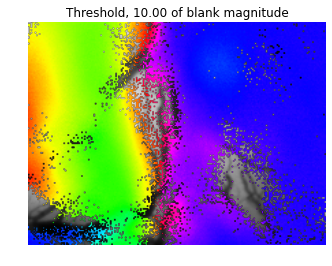

In [1416]:
# 3. PHASE MASKED BY MAG, OVERRLAY:
# -----------------------------------
# fig.add_subplot(2,4,3)
curr_key = rightkey
print curr_key

threshold_type = 'blank'
if threshold_type=='blank':
    blank_key = [k for k in dstructs if 'blank_' in k][0]
    print "BLANK: ", blank_key
use_norm = False
threshold=10

colormap = 'hsv'

smooth = False
sigma_val = (1,1)
Ny = len(D[curr_key]['freqs'])/2.
phase_map =D[curr_key]['phase_map']
mag_map =D[curr_key]['mag_map']/Ny

if smooth is True:
    # sigma_val = sigma_val
    phase_map[phase_map<0]=2*math.pi+phase_map[phase_map<0]
    phase_map = ndimage.gaussian_filter(phase_map, sigma=sigma_val, order=0)
    mag_map = ndimage.gaussian_filter(mag_map, sigma=sigma_val, order=0)
    vmin_val = 0
    vmax_val = 2*math.pi
else:
    vmin_val = -1*math.pi
    vmax_val = 1*math.pi
                
                
# Assign mask to use for thresholding:
if threshold_type=='DC':
    thresh_map = DC_mag_map
elif threshold_type=='magmax' or threshold_type=='logmax':
    thresh_map = mag_map
elif threshold_type=='blank': # 07-27-2016:  this doesnt exist yet!
    blank_mag_map = D[blank_key]['mag_map']/Ny
    if smooth is True:
        blank_mag_map = ndimage.gaussian_filter(blank_mag_map, sigma=sigma_val, order=0)
    thresh_map = blank_mag_map

# normalize threshold_map to do comparison against 0 map:
old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# normalize threshold_map to do comparison against 0 map:
old_min = thresh_map.min()
old_max = thresh_map.max()
new_min = 0
new_max = 1
normed_thresh_map = np.zeros(thresh_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(thresh_map.shape[1]):
        old_val = thresh_map[x, y]
        normed_thresh_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

if use_norm is True:
    [mx, my] = np.where(normed_mag_map >= threshold*normed_thresh_map)
    tit = 'Threshold, %.2f of normed %s magnitude' % (threshold, threshold_type)
else:
    [mx, my] = np.where(mag_map >= threshold*thresh_map)
    tit = 'Threshold, %.2f of %s magnitude' % (threshold, threshold_type)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
# tit = 'Threshold, %.2f of %s magnitude' % (threshold, threshold_type)

[nullx, nully] = np.where(phase_mask == 100)
# print len(mx)
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(surface, cmap='gray')
plt.imshow(phase_mask, cmap=colormap)
plt.axis('off')

plt.title(tit)

/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_flash_bar_013Hz/structs/FIG_log10power_Target_fft_Right_run2_(1, 1)_.pkl.png


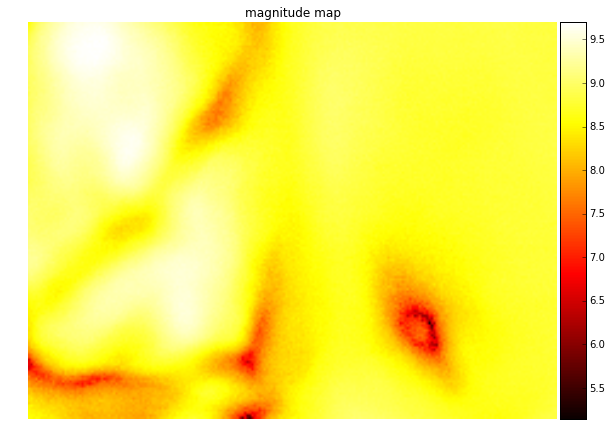

In [1439]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10,10))
# PHASE:

# plt.imshow(D[rightkey]['phase_map'], cmap='hsv', vmin=-1*math.pi, vmax=1*math.pi)

# MAG:
# curr_mag_map = 20*np.log10(D[rightkey]['mag_map']/Ny)
# curr_mag_map = 20*np.log10(D[rightkey]['mag_map']/Ny)

curr_mag_map = np.log10(D[rightkey]['mag_map']**2)
plt.title('magnitude map')
ax = plt.gca()
# im = ax.imshow(mag_map, cmap='gray')
# plt.colorbar()
plt.axis('off')
# plt.title('magnitude')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
im = ax.imshow(curr_mag_map, cmap='hot')
plt.colorbar(im, cax=cax, cmap='hot')


# plt.axis('off')

# plt.colorbar()
# imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, 'FIG_log10power_'+currkey+'.png')
plt.savefig(impath, format='png')


print impath

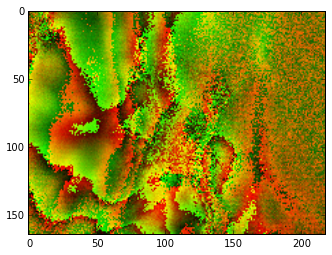

In [1308]:
# MERGE??

I_az = np.zeros((leftmap.shape[0], leftmap.shape[1], 3))
I_el = np.zeros((topmap.shape[0], topmap.shape[1], 3))

I = np.zeros((leftmap.shape[0], leftmap.shape[1], 3))
I[:,:,0] = np.angle(leftmap)
I[:,:,1] = np.angle(topmap)


# # define the colormap
# cmap = plt.cm.jet
# # extract all colors from the .jet map
# # cmaplist = [cmap(i) for i in range(cmap.N)]
# step = 100
# cmaplist = [cmap(i) for i in np.arange(0, 255+step, step)]
# # force the first color entry to be grey
# cmaplist[0] = (.5,.5,.5,1.0)
# # create the new map
# cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

plt.imshow(I)

# plt.subplot(1,2,1)
# plt.contour(np.angle(leftmap), cmap='bwr_r', alpha=1)
# # plt.contour(np.angle(topmap), cmap='YlGn', alpha=1)
# plt.axis('off')

# plt.subplot(1,2,2)
# plt.contour(V_left_legend, cmap='bwr_r', alpha=1)
# print V_left_legend.shape
# # plt.contour(H_up_legend, cmap='YlGn', alpha=1)
# print H_up_legend.shape

# plt.axis('off')
# plt.colorbar()


In [1309]:
# CONVER TO QUADS?

# quad_left = np.angle(leftmap)<0
# quad_right = np.angle(leftmap)>0

quad_left = np.angle(rightmap)>0
quad_right = np.angle(rightmap)<0


# quad_upper = np.angle(topmap)<0 
# quad_lower = np.angle(topmap)>0 # bottom half is POSITIVE for downward-movnig bar (TOP or "bottom")

quad_upper = np.angle(bottommap)>0 
quad_lower = np.angle(bottommap)<0 # bottom half is POSITIVE for downward-movnig bar (TOP or "bottom")

upper_left = quad_left&quad_upper
upper_right = quad_right&quad_upper
lower_left = quad_left&quad_lower
lower_right = quad_right&quad_lower

I = np.zeros(quad_left.shape)
I[upper_left] = 0
I[upper_right] = 1
I[lower_left] = 2
I[lower_right] = 3

colormap = np.array(['r','b','y','g'])

print I

[[ 2.  2.  2. ...,  0.  0.  0.]
 [ 2.  2.  2. ...,  0.  0.  0.]
 [ 2.  2.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  3.  2. ...,  0.  2.  2.]
 [ 0.  0.  0. ...,  2.  0.  0.]
 [ 0.  0.  0. ...,  2.  2.  0.]]


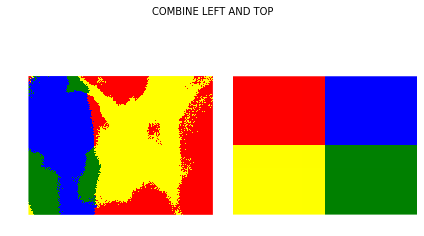

In [1310]:
import matplotlib.pyplot as plt
from matplotlib import colors

# np.random.seed(101)
# zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
# cmap = colors.ListedColormap(['white', 'red'])
cmap = colors.ListedColormap(['red', 'blue', 'yellow', 'green'], 'indexed')
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)



# bounds=[0,5,10]
# norm = colors.BoundaryNorm(bounds, cmap.N)

# # tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# make a color bar
# plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10])

# plt.savefig('redwhite.png')
# plt.show()


# colormap = np.array(['r', 'g', 'b'])
# plt.scatter(a[0], a[1], s=50, c=colormap[categories])


plt.subplot(1,2,1)
# plt.imshow(I,  interpolation='none', cmap=cmap) #, cmap=colormap) #, cmap=colormap[I[upper_left]], alpha=1)
img = plt.imshow(I, interpolation='none', origin='lower', cmap=cmap, norm=norm)
# plt.colorbar()
plt.axis('off')


plt.subplot(1,2,2)
# make a color bar
quad_legend = [[0,0,0,0,1,1,1,1],[0,0,0,0,1,1,1,1],[0,0,0,0,1,1,1,1],[2,2,2,2,3,3,3,3],[2,2,2,2,3,3,3,3],[2,2,2,2,3,3,3,3]]
# plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)

plt.imshow(quad_legend,interpolation='none', cmap=cmap)
plt.axis('off')
# plt.imshow(upper_right, cmap='gray', alpha=0.5)

# plt.subplot(1,2,2)
# plt.imshow(upper_right)

plt.suptitle('COMBINE LEFT AND TOP')
plt.tight_layout()

(-0.5, 7.5, 5.5, -0.5)

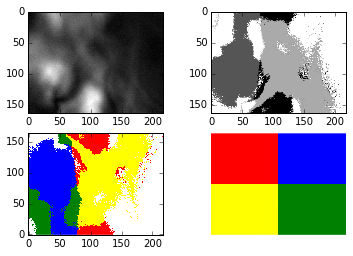

In [1311]:
# MASK!!!

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = leftkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(2,2,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(2,2,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = I[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(2,2,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = I[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
# plt.imshow(phase_mask, cmap=cmap) #, vmin=-1*math.pi, vmax=math.pi)

plt.imshow(phase_mask, interpolation='none', origin='lower', cmap=cmap, norm=norm)

###################################
fig.add_subplot(2,2,4)
plt.imshow(quad_legend,interpolation='none', cmap=cmap)
plt.axis('off')

CURR KEY :  Target_fft_Left_run1_(1, 1)_.pkl
35752
/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bar_013Hz/figures/hsv_summary_Target_fft_Left_run1_(1, 1)_.pkl.png


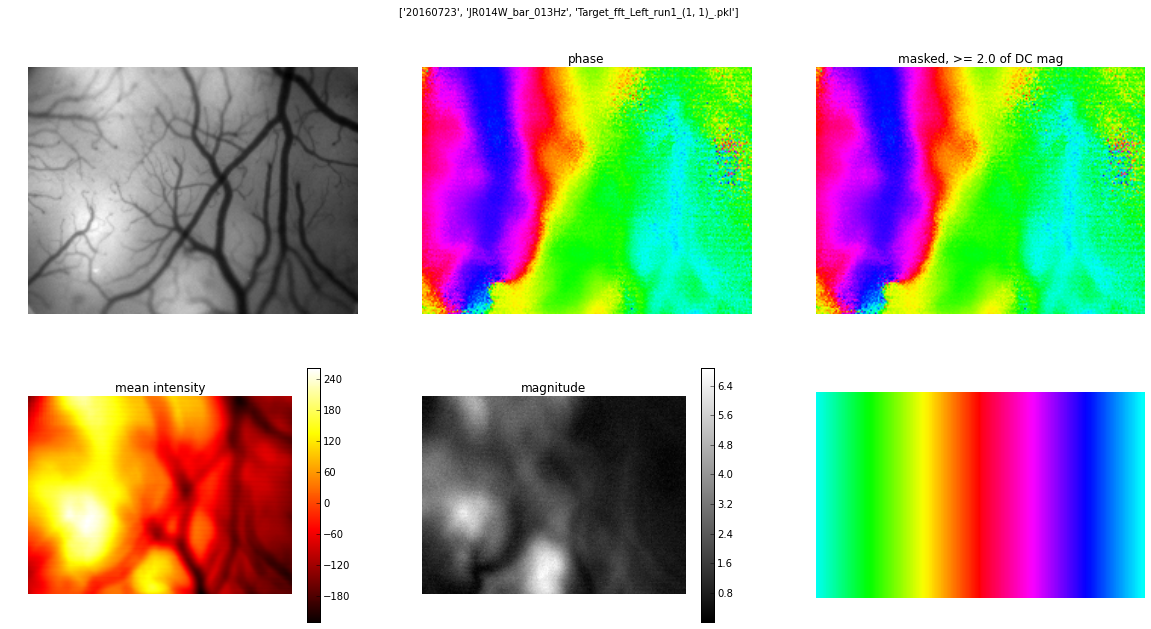

In [1319]:
curr_key = leftkey

print "CURR KEY : ", curr_key

mag_map = D[curr_key]['mag_map']/Ny
phase_map = D[curr_key]['phase_map']

DC_mag_map = D[curr_key]['DC_mag']/Ny
DC_phase_map = D[curr_key]['DC_phase']


log_thresh = 0.8
thresh = 2. #10 #0.5

use_log = 0
use_DC = 1

date = os.path.split(os.path.split(os.path.split(outdir)[0])[0])[1]
experiment = os.path.split(os.path.split(outdir)[0])[1]
# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------
# PLOT IT ALL: 
# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------

colormap = 'hsv'

# MAKE AND SAVE FIGURE:

if 'Left' in curr_key or 'Right' in curr_key:
    imname = 'AZ_HSV_%s' % curr_key
    if 'Left' in curr_key:
        legend = V_left_legend
    else:
        legend = V_right_legend
else:
    imname = 'EL_HSV_%s' % curr_key  
    if 'Top' in curr_key or 'Down' in curr_key:
        legend = H_down_legend
    else:
        legend = H_up_legend
        
        
fig = plt.figure(figsize=(20,10))

# 1.  SURFACE
# -----------------------------------
fig.add_subplot(2,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

# 2.  PHASE MAP
# -----------------------------------
fig.add_subplot(2,3,2)
plt.imshow(phase_map, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('phase')

# 3. PHASE MASKED BY MAG, OVERRLAY:
# -----------------------------------
fig.add_subplot(2,3,3)

# mag_map = D[curr_key]['mag_map']
# phase_map = D[curr_key]['phase_map']
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
    plot_title = 'masked, >= %s of log mag max' % str(log_thresh)
    
elif use_DC:
    [mx, my] = np.where(mag_map >= thresh*(DC_mag_map+0.001))
#     [mx, my] = np.where(0.5*mag_map >= DC_mag_map)
    plot_title = 'masked, >= %s of DC mag' % str(thresh)
    
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())
    plot_title = 'masked, >= %s of mag max' % str(thresh)

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = phase_map[mx, my]

[nullx, nully] = np.where(mask == 100)
print len(mx)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)
plt.imshow(surface, cmap='gray')
plt.imshow(mask, cmap=colormap)
plt.axis('off')
plt.title(plot_title)

# 4. MEAN INTENSITY:
# -----------------------------------
fig.add_subplot(2,3,4)
mean_intensity = D[curr_key]['mean_intensity']
plt.imshow(mean_intensity, cmap='hot')
plt.axis('off')
plt.colorbar()
plt.title('mean intensity')

# 5. MAG MAP:
# -----------------------------------
fig.add_subplot(2,3,5)
plt.imshow(mag_map, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('magnitude')

# 6. LEGEND
ax = fig.add_subplot(2,3,6)
plt.imshow(legend, cmap=colormap)
plt.axis('off')

plt.suptitle([date, experiment, curr_key])

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
impath = os.path.join(figdir, colormap+'_summary_'+curr_key+'.png')
plt.savefig(impath, format='png')
print impath

0.0
1.0
Cutoff at:  0.0
N nons:  0
(122, 164)
/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bin4_bar_013Hz/figures/EL_HSV_Target_fft_Bottom_run1_(1, 1)_.pkl.png


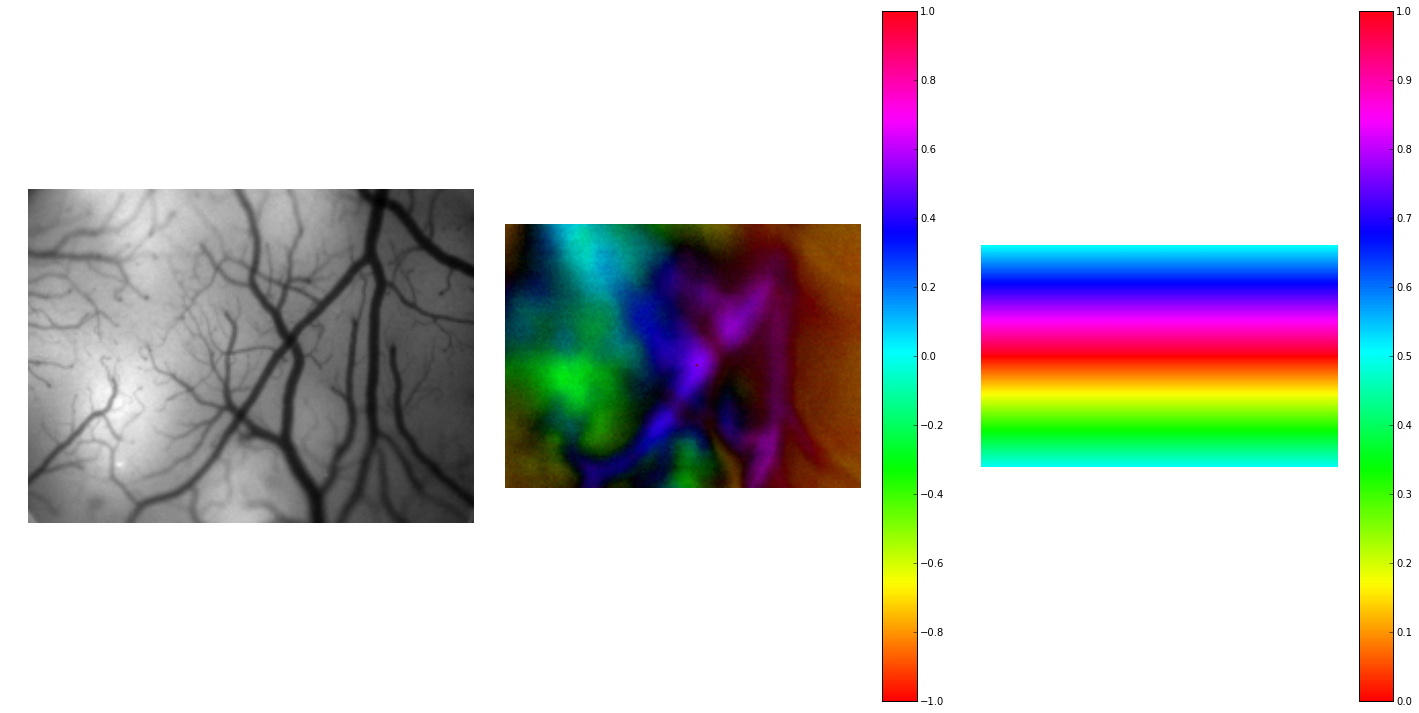

In [1291]:
## MAKE PASTEL HSV PLOTS:

## 07/23/2016 FIX THIS ##################################################3

curr_key = bottomkey

Ny = len(D[curr_key]['freqs'])/2.
fig = plt.figure()
mag_map = D[curr_key]['mag_map'] / Ny
phase_map = D[curr_key]['phase_map']

# plt.imshow(phase_map)

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


hue = normed_phase_map
sat = np.ones(hue.shape)
val = normed_mag_map

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * -1.
HSV[...,1] = val

# plt.imshow(normed_phase_map, cmap='hsv')
# plt.colorbar()

print normed_mag_map.min()
print normed_mag_map.max()


# CONVERT FROM HSV TO RGB:

import copy
cutoff = 1*min(normed_mag_map.ravel())
print "Cutoff at: ", cutoff
# thresh_val = copy.deepcopy(val)
nons = []
for x in range(val.shape[0]):
    for y in range(val.shape[1]):
#         print thresh_val[x, y]
        if val[x, y] < cutoff:
            nons.append([x,y])
print "N nons: ", len(nons)


# HSV TO RGB:

import colorsys
convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0],HSV[i,j,:][1],HSV[i,j,:][2])

            
# MASK & PLOT:

alpha_channel = np.ones(convmap[:,:,1].shape)
print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 1

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel


# MAKE AND SAVE FIGURE:

if 'Left' in curr_key or 'Right' in curr_key:
    imname = 'AZ_HSV_%s' % curr_key
    if 'Left' in curr_key:
        print "left"
        legend = V_left_legend
    else:
        legend = V_right_legend #V_right_legend
else:
    imname = 'EL_HSV_%s' % curr_key  
    if 'Top' in curr_key or 'Down' in curr_key:
        legend = H_down_legend
    else:
        legend = H_up_legend

                       
# NEED TO NORMALIZE LEGEND, too:
                       
old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_legend = np.zeros(legend.shape)
for x in range(legend.shape[0]):
    for y in range(legend.shape[1]):
        old_val = legend[x, y]
        normed_legend[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

                       
                       
fig = plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(surface, 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(surface, 'gray')
plt.imshow(composite, 'hsv') #, vmin=0, vmax=1)
plt.axis('off')
plt.colorbar()

ax = fig.add_subplot(1,3,3)
plt.imshow(normed_legend, cmap='hsv')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.colorbar()

plt.tight_layout()
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
impath = os.path.join(figdir, imname+'.png')
plt.savefig(impath, format='png')
print impath

mag range:  0.0107881355899 6.86317777444
phase range:  -3.14147694838 3.14107672412
HUE range:  1.84150560262e-05 0.999917887274
VAL range:  0.0 1.0
0.0
1.0
Cutoff at:  0.5
N pixels below threshold:   5397
HSV range:  0.0 1.0
[ 0.9108923  1.         0.9517962]
0.0
(164, 218)
left
/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bar_013Hz/figures/AZ_HSV_Target_fft_Left_run1_(1, 1)_.pkl.png


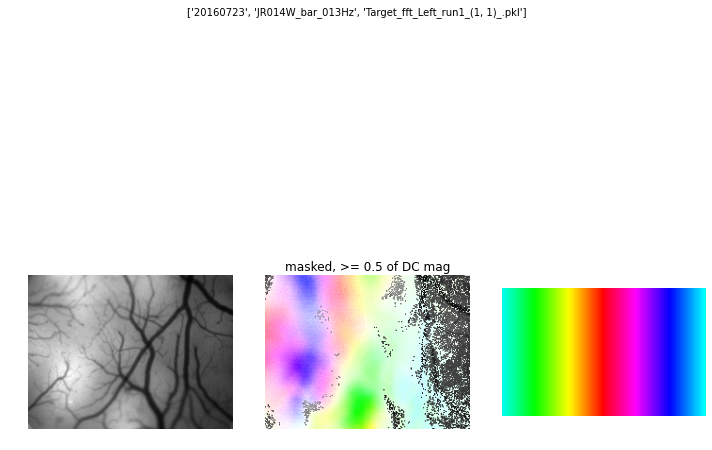

In [1362]:

# # THIS SEEMS TO WORK BETTER (FROM BOTTOM OF CIRC jnb)

# use_mag_max = 0
# use_DC = 1

# curr_key = leftkey

# Ny = len(D[curr_key]['freqs'])/2.
# fig = plt.figure()
# mag_map = D[curr_key]['mag_map'] / Ny
# phase_map = D[curr_key]['phase_map']

# DC_map = D[curr_key]['DC_mag']/Ny


# print "mag range: ", mag_map.min(), mag_map.max()
# print "phase range: ", phase_map.min(), phase_map.max()

# old_min = -math.pi #phase_map.min()
# old_max = math.pi #phase_map.max()
# new_min = 0
# new_max = 1
# normed_phase_map = np.zeros(phase_map.shape)
# for x in range(phase_map.shape[0]):
#     for y in range(phase_map.shape[1]):
#         old_val = phase_map[x, y]
#         normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# old_min = mag_map.min()
# old_max = mag_map.max()
# new_min = 0
# new_max = 1
# normed_mag_map = np.zeros(mag_map.shape)
# for x in range(mag_map.shape[0]):
#     for y in range(mag_map.shape[1]):
#         old_val = mag_map[x, y]
#         normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


# hue = normed_phase_map
# sat = np.ones(hue.shape)
# val = normed_mag_map
# print "HUE range: ", hue.min(), hue.max()
# print "VAL range: ", val.min(), val.max()

# HSV = np.ones(val.shape + (3,))
# HSV[...,0] = hue
# HSV[...,2] = sat * 1
# HSV[...,1] = val

# # plt.imshow(normed_phase_map, cmap='hsv')
# # plt.colorbar()

# print normed_mag_map.min()
# print normed_mag_map.max()


# ## REMOVE BELOW THRESH:

# cutoff_val = 0.5

# old_min = DC_map.min()
# old_max = DC_map.max()
# new_min = 0
# new_max = 1
# normed_DC_map = np.zeros(DC_map.shape)
# for x in range(DC_map.shape[0]):
#     for y in range(DC_map.shape[1]):
#         old_val = DC_map[x, y]
#         normed_DC_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


# import copy
# if use_mag_max:
#     cutoff = cutoff_val * max(normed_mag_map.ravel())
#     plot_title = 'masked, >= %s of mag max' % str(cutoff_val)
# elif use_DC:
#     cutoff = cutoff_val * max(normed_DC_map.ravel())
#     plot_title = 'masked, >= %s of DC mag' % str(cutoff_val)
    
# print "Cutoff at: ", cutoff
# thresh_val = copy.deepcopy(val)

# nons = []
# for x in range(thresh_val.shape[0]):
#     for y in range(thresh_val.shape[1]):

# #         if val[x, y] < cutoff:
#         if val[x, y] < normed_DC_map[x, y]*cutoff_val:
            
#             nons.append([x,y])
# print "N pixels below threshold:  ", len(nons)


# # if use_log:
# #     [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
# #     plot_title = 'masked, >= %s of log mag max' % str(log_thresh)
    
# # elif use_DC:
# #     [mx, my] = np.where(mag_map >= thresh*(DC_mag_map+0.001))
# # #     [mx, my] = np.where(0.5*mag_map >= DC_mag_map)
# #     plot_title = 'masked, >= %s of DC mag' % str(thresh)
    
# # else:
# #     [mx, my] = np.where(mag_map >= thresh*mag_map.max())
# #     plot_title = 'masked, >= %s of mag max' % str(thresh)

# # mask = np.ones(mag_map.shape) * 100
# # mask[mx, my] = phase_map[mx, my]

# # [nullx, nully] = np.where(mask == 100)
# # print len(mx)
# # mask[nullx, nully] = np.nan
# # mask = np.ma.array(mask)
# # plt.imshow(surface, cmap='gray')
# # plt.imshow(mask, cmap=colormap)
# # plt.axis('off')
# # plt.title(plot_title)

# # nons = [[x, y] for x,y in zip(mx,my)]


# ##
# # HSV TO RGB:

# import colorsys
# convmap = np.empty(HSV.shape)

# for i in range(HSV.shape[0]):
#     for j in range(HSV.shape[1]):

#             convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
# print "HSV range: ", HSV.min(), HSV.max()
# print convmap[i,j,:]
# print convmap.min()

# ##
# # MASK:

# alpha_channel = np.ones(convmap[:,:,1].shape)
# print alpha_channel.shape
# for i in nons:
#     alpha_channel[i[0], i[1]] = 0

# composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
# composite[:,:,0:3] = convmap[:,:,:]

# composite[:,:,3] = alpha_channel


# THIS SEEMS TO WORK BETTER (FROM BOTTOM OF CIRC jnb)

# thresh_method = 'magmax'
# thresh_method = 'DC'
thresh_method = 'DC'

cutoff_val = 0.5

# use_mag_max = 0
# use_DC = 0
# use_blank = 1

curr_key = leftkey

Ny = len(D[curr_key]['freqs'])/2.

fig = plt.figure()
mag_map = D[curr_key]['mag_map'] / Ny
phase_map = D[curr_key]['phase_map']

DC_map = D[curr_key]['DC_mag']/Ny
# blank_map = D[blank_key]['mag_map']/Ny

print "mag range: ", mag_map.min(), mag_map.max()
print "phase range: ", phase_map.min(), phase_map.max()


# Get normed PHASE map for stimulation condN for HSV composite:

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


# Get normed MAGNITUDE map for stimulation condN for HSV composite:
old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

        
# CHOOSE MAG METHOD TO THRESHOLD OFF OF:

import copy

if thresh_method=='magmax':
    thresh_map = copy.deepcopy(mag_map)
    plot_title = 'masked, >= %s of mag max' % str(cutoff_val)
elif thresh_method=='DC':
    thresh_map = copy.deepcopy(DC_map)
    plot_title = 'masked, >= %s of DC mag' % str(cutoff_val)
elif thresh_method=='blank':
    thresh_map = copy.deepcopy(blank_map)
    plot_title = 'masked, >= %s of blank mag' % str(cutoff_val)

    
# # NORMALIZE THERSHOLD MAP???
old_min = thresh_map.min()
old_max = thresh_map.max()
new_min = 0
new_max = 1
normed_thresh_map = np.zeros(thresh_map.shape)
for x in range(thresh_map.shape[0]):
    for y in range(thresh_map.shape[1]):
        old_val = thresh_map[x, y]
        normed_thresh_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


hue = normed_phase_map
sat = np.ones(hue.shape)
val = normed_mag_map

print "HUE range: ", hue.min(), hue.max()
print "VAL range: ", val.min(), val.max()

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * 1
HSV[...,1] = val

# plt.imshow(normed_phase_map, cmap='hsv')
# plt.colorbar()

print normed_mag_map.min()
print normed_mag_map.max()


## REMOVE BELOW THRESH:

print "Cutoff at: ", cutoff

nons = []
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
#         if mag_map[x, y] < thresh_map[x, y]*cutoff_val:
        if normed_mag_map[x, y] < normed_thresh_map[x, y]*cutoff_val:
            nons.append([x,y])
        
# NOTE ON THRESHOLDING:
# If use normed-mag against normed-threshold-map, get good removal of baddies.
# BUT, if use actual mag-map values against actual blank/DC map conditions, too much stuff gets included...

                
print "N pixels below threshold:  ", len(nons)

##
# HSV TO RGB:

import colorsys
convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
            
print "HSV range: ", HSV.min(), HSV.max()
print convmap[i,j,:]
print convmap.min()

##
# MASK:

alpha_channel = np.ones(convmap[:,:,1].shape)
print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 0

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel


# PLOT:


# MAKE AND SAVE FIGURE:

if 'Left' in curr_key or 'Right' in curr_key:
    imname = 'AZ_HSV_%s' % curr_key
    if 'Left' in curr_key:
        print "left"
        legend = V_left_legend
    else:
        legend = V_right_legend #V_right_legend
else:
    imname = 'EL_HSV_%s' % curr_key  
    if 'Top' in curr_key or 'Down' in curr_key:
        legend = H_down_legend
    else:
        legend = H_up_legend

date = os.path.split(os.path.split(os.path.split(outdir)[0])[0])[1]
experiment = os.path.split(os.path.split(outdir)[0])[1]
        
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(surface, 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(surface, 'gray')
plt.imshow(composite, 'hsv')
plt.axis('off')
plt.title(plot_title)
# plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(legend, cmap='hsv')
plt.axis('off')

plt.suptitle([date, experiment, curr_key])

plt.tight_layout()
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
impath = os.path.join(figdir, imname+'.png')
plt.savefig(impath, format='png')
print impath



<matplotlib.colorbar.Colorbar instance at 0x7f55b16f6248>

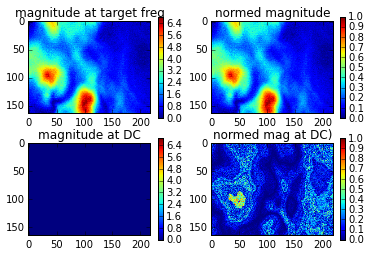

In [1376]:
# Checkout the threshold map...

plt.subplot(2,2,1)
plt.imshow(mag_map, vmin=0, vmax=mag_map.max()) 
plt.title('magnitude at target freq')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(normed_mag_map, vmin=0, vmax=1)
plt.title('normed magnitude')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(thresh_map,  vmin=0, vmax=mag_map.max())
if thresh_method=='DC':
    plt.title('magnitude at DC')
# elif thresh_method=='magmax'
#     plt.
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(normed_thresh_map, vmin=0, vmax=1)
plt.title('normed mag at DC)')
plt.colorbar()

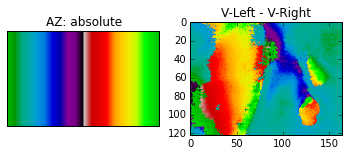

In [734]:
######################################################################
# ABSOLUTE AZIMUTH
######################################################################
# For LEFTMAP - RIGHTMAP, color legend follows LEFT-only map direction:

azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.

# SEE ABOVE COLORBAR
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: absolute')
fig.add_subplot(1,2,2)
plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left - V-Right')

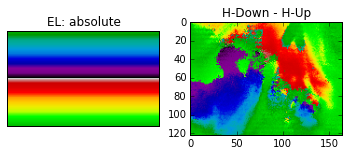

In [735]:
######################################################################
# ABSOLUTE ELEVATION
######################################################################

elevation_phase = ( np.angle(topmap) - np.angle(bottommap) ) / 2.

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: absolute')
fig.add_subplot(1,2,2)
plt.imshow(elevation_phase, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down - H-Up')

(-0.5, 479.5, 299.5, -0.5)

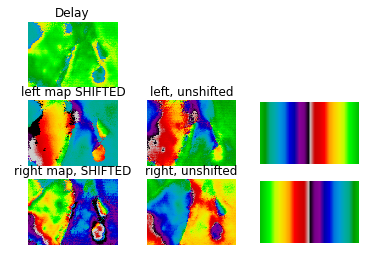

In [736]:
######################################################################
# DELAY VERT:
######################################################################

fig = plt.figure()

colormap = 'spectral'

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_vert = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_vert = np.angle(leftmap * rightmap) / 2.
plt.imshow(delay_vert, cmap=colormap,  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. LEFT-map shifted
fig.add_subplot(3,3,4)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
shift_left = np.angle(leftmap) - delay_vert
plt.imshow(shift_left, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left map SHIFTED')

# 4. LEFT-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(leftmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left, unshifted')

# 5.  LEFT-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(V_left_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. RIGHT-map shifted
fig.add_subplot(3,3,7)
# shift_right = np.angle(rightmap) - delay_vert
shift_right = np.angle(rightmap.conjugate()) - delay_vert
plt.imshow(shift_right, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right map, SHIFTED')

# 7. RIGHT-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(rightmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right, unshifted')

# 8. RIGHT-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(V_right_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

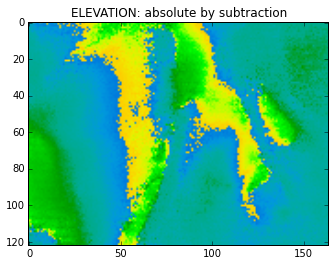

In [737]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

NameError: name 'double_left_legend' is not defined

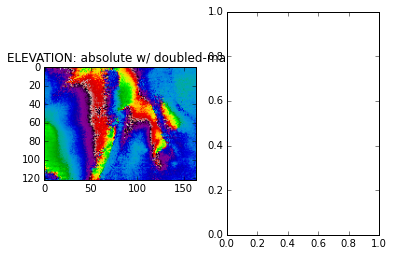

In [738]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
fig = plt.figure()
fig.add_subplot(1,2,1)
azimuth_phase = np.angle(leftmap / rightmap) 
# azimuth_phase = np.angle(rightmap / leftmap) 

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ doubled-map')

fig.add_subplot(1,2,2)
plt.imshow(double_left_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)


(-0.5, 479.5, 299.5, -0.5)

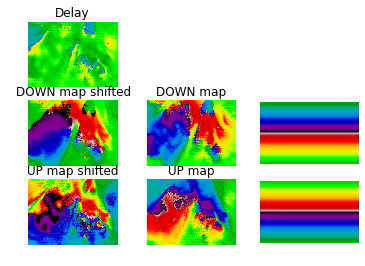

In [739]:
######################################################################
# DELAY HORIZ:
######################################################################

fig = plt.figure()

# 1. Delay map
fig.add_subplot(3,3,1)
delay_horz = np.angle(topmap * bottommap) / 2.
plt.imshow(delay_horz, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. DOWN-map shifted
fig.add_subplot(3,3,4)
# shift_down = np.angle(downmap.conjugate()) - delay_horz
shift_top = np.angle(topmap) - delay_horz
plt.imshow(shift_top, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map shifted')

# 4. DOWN-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(topmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map')

# 5.  Down-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(H_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. UP-map shifted
fig.add_subplot(3,3,7)
shift_bottom = np.angle(bottommap.conjugate()) - delay_horz
# shift_up = delay_horz - np.angle(upmap.conjugate())
plt.imshow(shift_bottom, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map shifted')

# 7. UP-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(bottommap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map')

# 8. UP-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(H_up_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

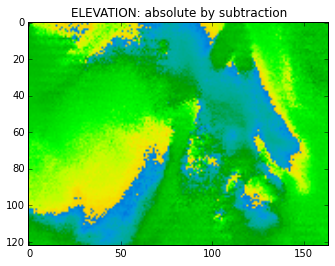

In [740]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = ( np.angle(topmap / bottommap) ) / 2.

plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

NameError: name 'double_down_legend' is not defined

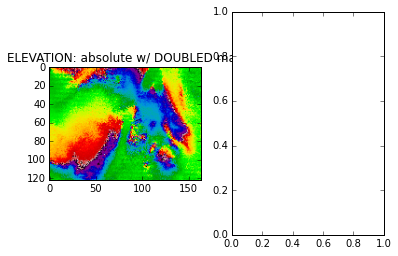

In [741]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = np.angle(topmap / bottommap)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ DOUBLED map')

fig.add_subplot(1,2,2)
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

In [742]:
#######################################
# Set THRESHOLD params:
#######################################

thresh = 0.3
log_thresh = 0.7
use_log = 1

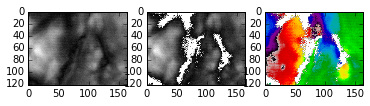

In [743]:

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = leftkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

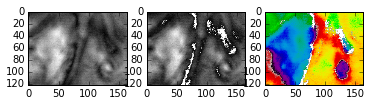

In [744]:
# V-RIGHT:  MASK WITH MAGNITUDE:
# RIGHT 

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = rightkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

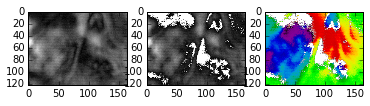

In [745]:
# MASK WITH MAGNITUDE:
# H-DOWN: 
log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = topkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

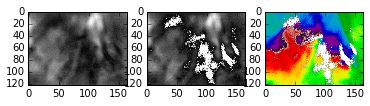

In [746]:
# MASK WITH MAGNITUDE:
# H-UP: 

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = bottomkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

-3.0578228497872217

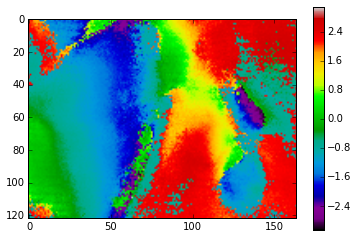

In [747]:
######################################################################
# ABSOLUTE AZIMUTH -- SHIFT NEGATIVE VALS
######################################################################

phase_left = np.angle(leftmap)
phase_right = np.angle(rightmap)

for x in range(phase_left.shape[0]):
    for y in range(phase_left.shape[1]):
        if phase_left[x,y] < 0:
            phase_left[x,y] += 2*math.pi

for x in range(phase_right.shape[0]):
    for y in range(phase_right.shape[1]):
        if phase_right[x,y] < 0:
            phase_right[x,y] += 2*math.pi

        
# plt.imshow(phase_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# phase_left

# plt.subplot(1,2,2)
# plt.imshow(phase_right, cmap='spectral')
# plt.colorbar()
        
az = (phase_left - phase_right) / 2.
# plt.imshow(az, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.imshow(az, cmap='spectral') #, vmin=0, vmax=2*math.pi)
plt.colorbar()
# plt.colorbar()
# x = np.where(phase_left<0)
# len(x[1])
# phase_left.max()
az.min()

/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_bar_013Hz/structs/AZ_right_phase_overlay_withkey.jpg


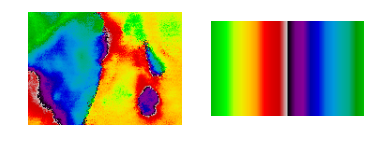

In [748]:
# GCaMP6f map - Vertically-moving right looks dec:

use_log = 1
log_thresh = 0.7
thresh = 0.3

curr_key = rightkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(V_right_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'AZ_right_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_bar_013Hz/structs/EL_bottom_phase_overlay_withkey.jpg


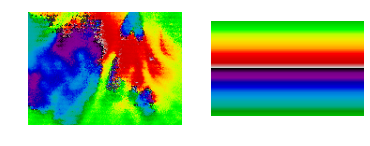

In [749]:
# fig = plt.figure()

curr_key = topkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

use_log = 1
log_thresh = 0.7
thresh = 0.5

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(H_up_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'EL_bottom_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

Target_fft_Top_run1_(1, 1)_.pkl
/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_bar_013Hz/structs/EL_top_phase_overlay_withkey.jpg


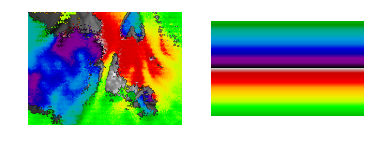

In [750]:
# fig = plt.figure()

use_log = 1
log_thresh = 0.8
# thresh = 0.2

curr_key = topkey
print curr_key

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

# use_log = 1
# log_thresh = 0.7

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'EL_top_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

/media/nas/volume1/widefield/data/JR006W/20160715/JR006W_bar_013Hz/structs/AZ_left_phase_overlay_withkey.jpg


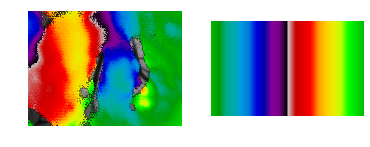

In [981]:
# fig = plt.figure()

curr_key = leftkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

use_log = 1
log_thresh = 0.8
# thresh = 0.3

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'AZ_left_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

# print D.keys()